In [ ]:
!pip install rasterio

     |████████████████████████████████| 19.1MB 1.2MB/s 


In [ ]:
!pip install tifffile

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import rasterio
import numpy as np
import tifffile as tiff
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
############################################
## Hard coded paths and vars
BDIR = '/content/drive/My Drive/MUSA650-Spring2021/MUSA650-Final-Project'
IMGDIR = BDIR + '/Image'
IMGID1 = 'Dunhuang_Sentinel_20160801_20160831'
IMGID2 = 'Dunhuang_Sentinel_20200801_20200831'
BANDS = ['B2', 'B3', 'B4']

In [ ]:
def imageRead(IMGID):
  with rasterio.open(IMGDIR + '/' + IMGID + '.' + BANDS[0] + '.tif') as f:
    print('Reading band: 1 ' + BANDS[0])
    tmpImg = f.read(1)
  imgMat = np.zeros([tmpImg.shape[0], tmpImg.shape[1], len(BANDS)])
  imgMat[:,:,0] = tmpImg

  for i, tmpB in enumerate(BANDS[1:]):
    print('Reading band: ' + str(i+2) + ' ' + tmpB)
    with rasterio.open(IMGDIR + '/' + IMGID + '.' + tmpB + '.tif') as f:
      imgMat[:,:,i+1] = f.read(1)
  imgMat = imgMat.astype(np.float32)
  return imgMat

In [ ]:
dunhuang_16 = imageRead(IMGID1)
dunhuang_20 = imageRead(IMGID2)

Reading band: 1 B2
Reading band: 2 B3
Reading band: 3 B4
Reading band: 1 B2
Reading band: 2 B3
Reading band: 3 B4


In [ ]:
dunhuang_16.shape

(1003, 1225, 3)

In [ ]:
dunhuang_20

array([[[0.1901 , 0.21035, 0.2541 ],
        [0.1901 , 0.21115, 0.2565 ],
        [0.1911 , 0.21285, 0.2606 ],
        ...,
        [0.187  , 0.20385, 0.2373 ],
        [0.1871 , 0.20525, 0.23965],
        [0.1787 , 0.1949 , 0.2251 ]],

       [[0.2024 , 0.22705, 0.2796 ],
        [0.20805, 0.2388 , 0.2989 ],
        [0.20605, 0.23575, 0.2949 ],
        ...,
        [0.17385, 0.1881 , 0.21705],
        [0.1741 , 0.18855, 0.2177 ],
        [0.1759 , 0.1909 , 0.21925]],

       [[0.196  , 0.21625, 0.26115],
        [0.19305, 0.2125 , 0.2552 ],
        [0.1928 , 0.21255, 0.25715],
        ...,
        [0.18925, 0.2081 , 0.2418 ],
        [0.18925, 0.2074 , 0.2422 ],
        [0.19285, 0.21235, 0.2483 ]],

       ...,

       [[0.1918 , 0.20515, 0.2349 ],
        [0.1919 , 0.2047 , 0.2347 ],
        [0.19275, 0.2054 , 0.23365],
        ...,
        [0.20075, 0.22175, 0.2646 ],
        [0.2044 , 0.2293 , 0.27675],
        [0.2077 , 0.23405, 0.28345]],

       [[0.1922 , 0.20555, 0.23675],
  

In [ ]:
def scaleImgPerc(imgIn):
    w, h, d = imgIn.shape
    imgIn = np.reshape(imgIn, [w * h, d]).astype(np.float32)
    # Get 1st and 99th percentile
    mins = np.percentile(imgIn, 1, axis=0)
    maxs = np.percentile(imgIn, 99, axis=0) - mins
    imgIn = (imgIn - mins[None, :]) / maxs[None, :]
    imgIn = np.reshape(imgIn, [w, h, d])
    imgIn = (imgIn.clip(0, 1) * 255).astype(np.uint8)
    return imgIn

In [ ]:
dunhuang_16 = scaleImgPerc(dunhuang_16)
dunhuang_20 = scaleImgPerc(dunhuang_20)

(<Figure size 988.8x604.8 with 2 Axes>,
 <matplotlib.image.AxesImage at 0x7f8e24576e90>)

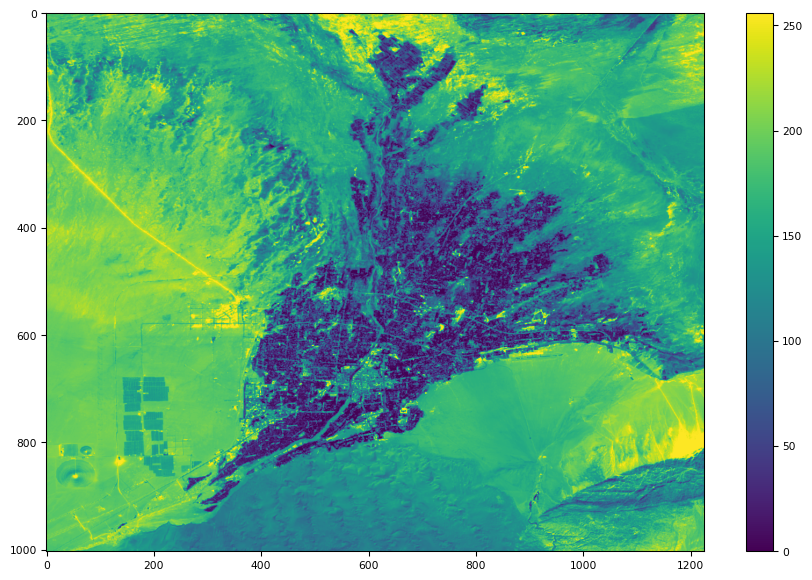

In [ ]:
tiff.imshow(dunhuang_20[:,:,0])

In [ ]:
w, h, d = dunhuang_20.shape
print(w, h, d)
imgVec = np.reshape(dunhuang_20, [w * h, d])
imgVec.shape

1003 1225 3


(1228675, 3)

In [ ]:
print(str([1,23]))

[1, 23]


In [ ]:
kVals = KMeans(n_clusters=3, random_state=0).fit(imgVec)

[Text(1, 0, '1'), Text(1, 0, '2'), Text(1, 0, '3')]

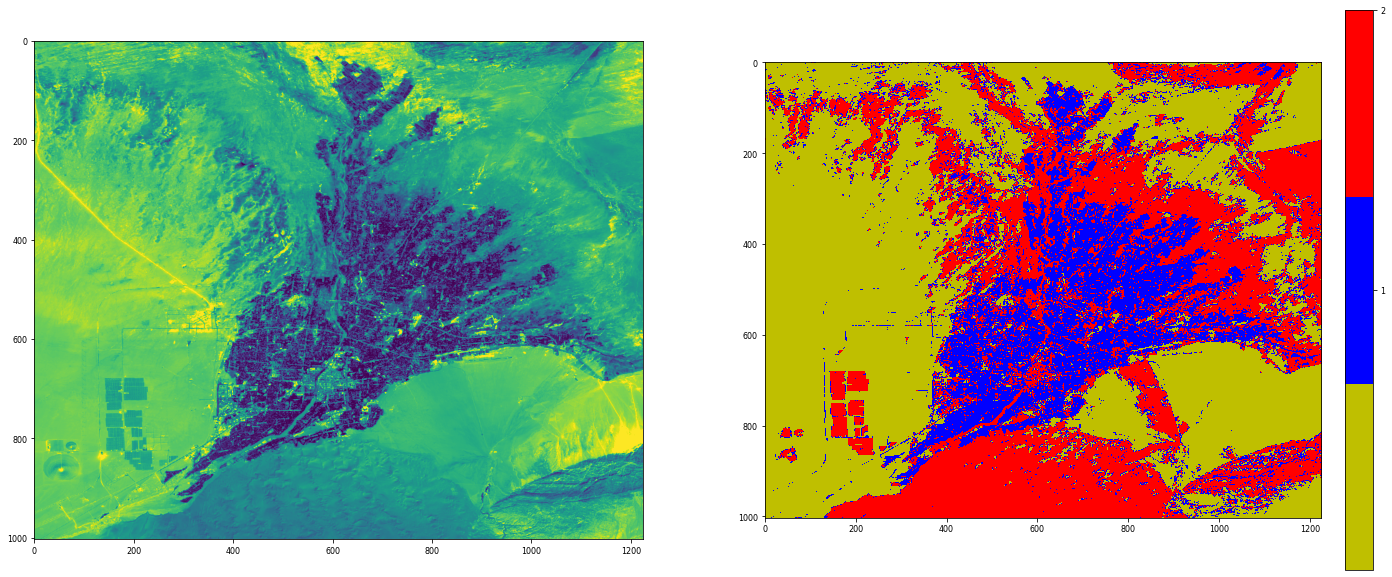

In [ ]:
lImg = kVals.labels_.reshape([w, h])
fig, ax = plt.subplots(1, 2, figsize=[24,24])
#cmap = matplotlib.colors.ListedColormap(['y', 'b', 'r', 'g', 'm', 'k']) #6 classes
cmap = matplotlib.colors.ListedColormap(['y', 'b', 'r']) #3 classes
# ax[0].imshow(imgMatScCrop[:,:,0])
ax[0].imshow(dunhuang_20[:,:,0])
p = ax[1].imshow(lImg, cmap=cmap)
cbar = fig.colorbar(p, ax=ax[1], fraction=0.046, pad=0.04, ticks=np.arange(1,4))
cbar.ax.set_yticklabels(['1','2','3'])

In [ ]:
kVals10 = KMeans(n_clusters=10, random_state=0).fit(imgVec)

[Text(1, 0, '1'),
 Text(1, 0, '2'),
 Text(1, 0, '3'),
 Text(1, 0, '4'),
 Text(1, 0, '5'),
 Text(1, 0, '6'),
 Text(1, 0, '7'),
 Text(1, 0, '8'),
 Text(1, 0, '9'),
 Text(1, 0, '10')]

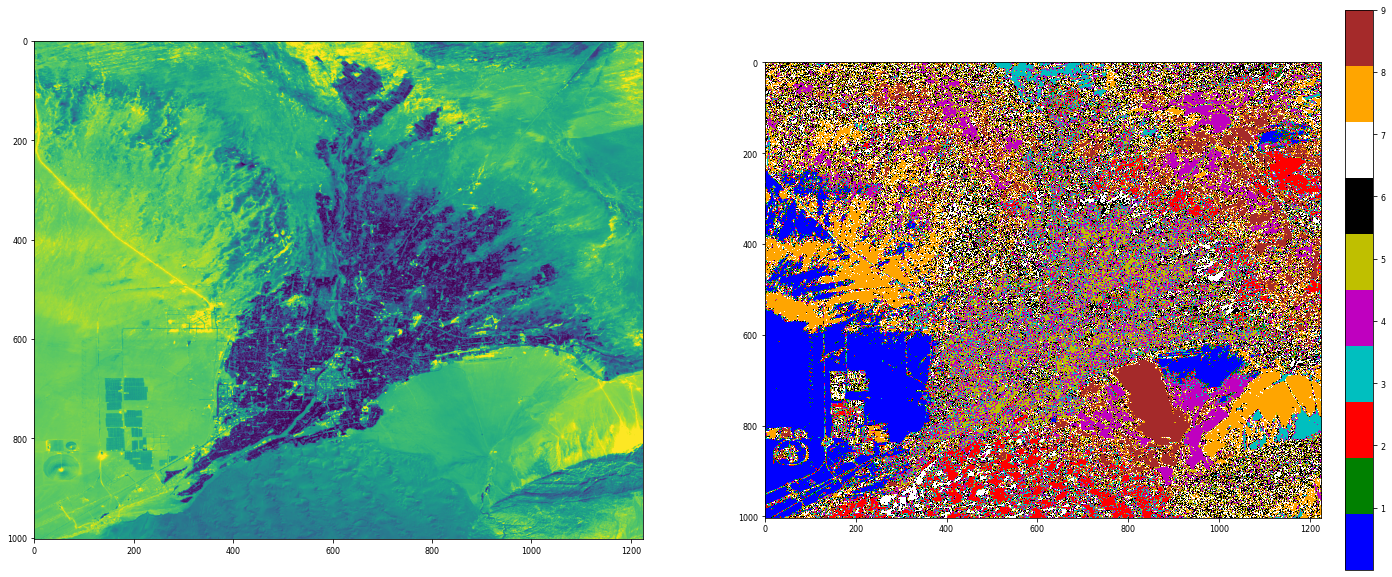

In [ ]:
lImg = kVals10.labels_.reshape([w, h])
fig, ax = plt.subplots(1, 2, figsize=[24,24])
cmap = matplotlib.colors.ListedColormap(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','orange','brown']) #10 classes
# ax[0].imshow(imgMatScCrop[:,:,0])
ax[0].imshow(dunhuang_20[:,:,0])
p = ax[1].imshow(lImg, cmap=cmap)
cbar = fig.colorbar(p, ax=ax[1], fraction=0.046, pad=0.04, ticks=np.arange(1,11))
cbar.ax.set_yticklabels(['1','2','3','4','5','6','7','8','9','10'])

In [ ]:
lImg.shape

(1003, 1225)

[INFO] Computing Difference Image ...
[INFO] Computing Difference Image took 0.005633831024169922 seconds


(<Figure size 988.8x604.8 with 2 Axes>,
 <matplotlib.image.AxesImage at 0x7f8e19c51810>)

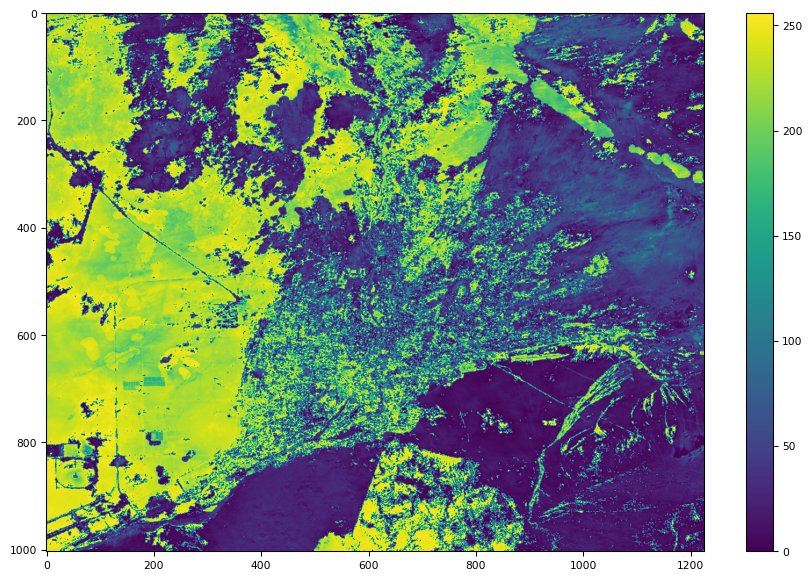

In [ ]:
import time
# Difference Image
print('[INFO] Computing Difference Image ...')
start = time.time()
diff_image = abs(dunhuang_20 - dunhuang_16)
end = time.time()
print('[INFO] Computing Difference Image took {} seconds'.format(end-start))
diff_image=diff_image[:,:,1]
tiff.imshow(diff_image)

The following code chunks are inspired by https://github.com/ChaymaBouzaidii/Change-detection-in-multitemporal-satellite-images. Thanks Ihebeddine Ryahi and Chayma Bouzaidii for their amazing work in proposing the organizing the code 

In [ ]:
import cv2 
import sklearn
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.decomposition import PCA
import skimage.morphology

In [ ]:
def find_vector_set(diff_image, new_size):
 
    i = 0
    j = 0
    vector_set = np.zeros((int(new_size[0] * new_size[1] / 25),25))
    while i < vector_set.shape[0]:
        while j < new_size[1]:
            k = 0
            while k < new_size[0]:
                block   = diff_image[j:j+5, k:k+5]
                feature = block.ravel()
                vector_set[i, :] = feature
                k = k + 5
            j = j + 5
        i = i + 1
 
    mean_vec   = np.mean(vector_set, axis = 0)
    # Mean normalization
    vector_set = vector_set - mean_vec   
    return vector_set, mean_vec

def find_FVS(EVS, diff_image, mean_vec, new):
 
    i = 2
    feature_vector_set = []
 
    while i < new[1] - 2:
        j = 2
        while j < new[0] - 2:
            block = diff_image[i-2:i+3, j-2:j+3]
            feature = block.flatten()
            feature_vector_set.append(feature)
            j = j+1
        i = i+1
 
    FVS = np.dot(feature_vector_set, EVS)
    FVS = FVS - mean_vec
    print ("[INFO] Feature vector space size", FVS.shape)
    return FVS

def clustering(FVS, components, new):
    kmeans = KMeans(components, verbose = 0)
    kmeans.fit(FVS)
    output = kmeans.predict(FVS)
    count  = Counter(output)
 
    least_index = min(count, key = count.get)
    change_map  = np.reshape(output,(new[1] - 4, new[0] - 4))
    return least_index, change_map

array([1003, 1225])

In [77]:
out_dir= BDIR + 'ChangeMaps'
out_dir

'/content/drive/My Drive/MUSA650-Spring2021/MUSA650-Final-ProjectChangeMaps'

In [73]:
mean_vec

array([ 7.08417483e-16,  3.09011706e-14, -4.17116214e-14, ...,
       -3.68943825e-14,  3.01502481e-14,  8.16167783e-14])

In [78]:
# Resize Images
print('[INFO] Resizing Images ...')
start = time.time()
new_size = np.asarray(dunhuang_16.shape) /5
new_size = new_size.astype(int) *5
image1 = cv2.resize(dunhuang_16, (new_size[0],new_size[1])).astype(int)
image2 = cv2.resize(dunhuang_20, (new_size[0],new_size[1])).astype(int)
end = time.time()
print('[INFO] Resizing Images took {} seconds'.format(end-start))

# Difference Image
print('[INFO] Computing Difference Image ...')
start = time.time()
diff_image = abs(image1 - image2)
cv2.imwrite(out_dir+'difference.jpg', diff_image)
end = time.time()
print('[INFO] Computing Difference Image took {} seconds'.format(end-start))
diff_image=diff_image[:,:,1]



print('[INFO] Performing PCA ...')
start = time.time()
pca = PCA()
vector_set, mean_vec=find_vector_set(diff_image, new_size)
pca.fit(vector_set)
EVS = pca.components_
end = time.time()
print('[INFO] Performing PCA took {} seconds'.format(end-start))

print('[INFO] Building Feature Vector Space ...')
start = time.time()
FVS = find_FVS(EVS, diff_image, mean_vec, new_size)
components = 3
end = time.time()
print('[INFO] Building Feature Vector Space took {} seconds'.format(end-start))

print('[INFO] Clustering ...')
start = time.time()
least_index, change_map = clustering(FVS, components, new_size)
end = time.time()
print('[INFO] Clustering took {} seconds'.format(end-start))

change_map[change_map == least_index] = 255
change_map[change_map != 255] = 0
change_map = change_map.astype(np.uint8)

print('[INFO] Save Change Map ...')
cv2.imwrite(out_dir+'ChangeMap.jpg', change_map)

print('[INFO] Performing Closing ...')
print('[WARNING] Kernel is fixed depending on image topology')
print('[WARNING] Closing with disk-shaped structuring element with radius equal to 6')
kernel = skimage.morphology.disk(6)
CloseMap = cv2.morphologyEx(change_map, cv2.MORPH_CLOSE, kernel)
cv2.imwrite(out_dir+'CloseMap.jpg', CloseMap)

print('[INFO] Performing Opening ...')
OpenMap = cv2.morphologyEx(CloseMap, cv2.MORPH_OPEN, kernel)
cv2.imwrite(out_dir+'OpenMap.jpg', OpenMap)

print('[INFO] End Change Detection')

[INFO] Resizing Images ...
[INFO] Resizing Images took 0.022509098052978516 seconds
[INFO] Computing Difference Image ...
[INFO] Computing Difference Image took 0.0583956241607666 seconds
[INFO] Performing PCA ...
[INFO] Performing PCA took 0.21646928787231445 seconds
[INFO] Building Feature Vector Space ...
[INFO] Feature vector space size (1216116, 25)
[INFO] Building Feature Vector Space took 4.486247539520264 seconds
[INFO] Clustering ...
[INFO] Clustering took 25.348073959350586 seconds
[INFO] Save Change Map ...
[INFO] Performing Closing ...
[WARNING] Kernel is fixed depending on image topology
[WARNING] Closing with disk-shaped structuring element with radius equal to 6
[INFO] Performing Opening ...
[INFO] End Change Detection


(<Figure size 988.8x604.8 with 2 Axes>,
 <matplotlib.image.AxesImage at 0x7f8e0215e350>)

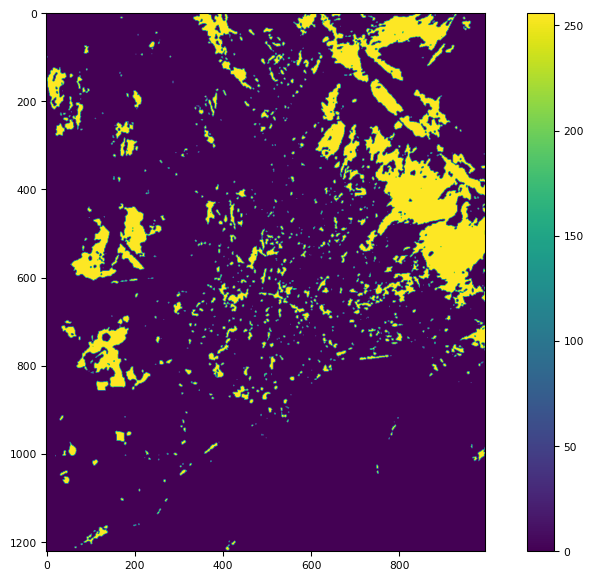

In [80]:
tiff.imshow(change_map)

(<Figure size 988.8x604.8 with 2 Axes>,
 <matplotlib.image.AxesImage at 0x7f8e018a1310>)

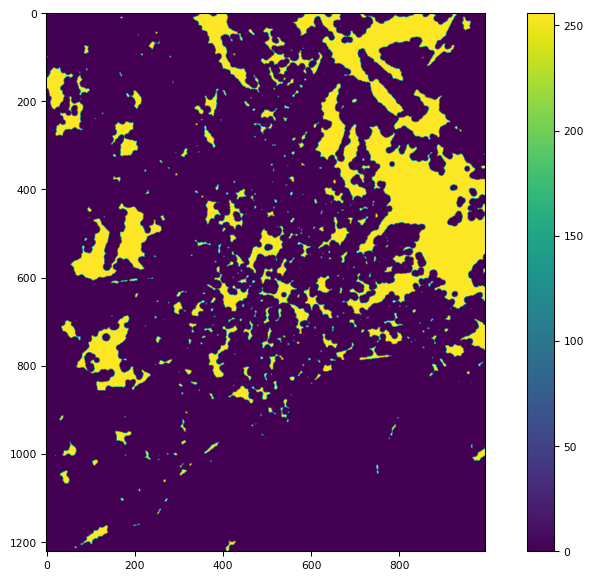

In [83]:
tiff.imshow(CloseMap)

(<Figure size 988.8x604.8 with 2 Axes>,
 <matplotlib.image.AxesImage at 0x7f8dfd5dffd0>)

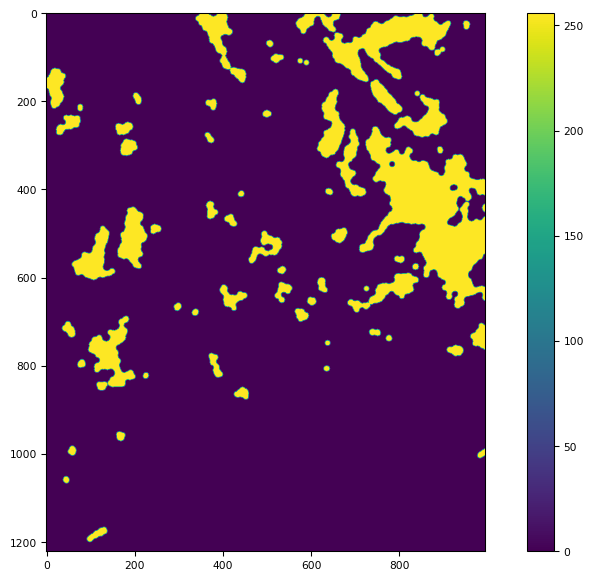

In [82]:
tiff.imshow(OpenMap)